In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
stocks=input('Enter the Code')
data=yf.download(stocks,'2008-01-01','2022-12-18',auto_adjust=True)
data.head()

Enter the CodeNg=F
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,7.572,7.876,7.564,7.850,68553
2008-01-03,7.873,7.980,7.610,7.674,72742
2008-01-04,7.652,7.859,7.500,7.841,61496
2008-01-07,7.803,7.940,7.701,7.879,56675
2008-01-08,7.909,7.997,7.880,7.967,53775


In [6]:
data.shape

(3768, 5)

In [7]:
data.info


<bound method DataFrame.info of              Open   High    Low  Close  Volume
Date                                          
2008-01-02  7.572  7.876  7.564  7.850   68553
2008-01-03  7.873  7.980  7.610  7.674   72742
2008-01-04  7.652  7.859  7.500  7.841   61496
2008-01-07  7.803  7.940  7.701  7.879   56675
2008-01-08  7.909  7.997  7.880  7.967   53775
...           ...    ...    ...    ...     ...
2022-12-12  6.950  7.058  6.487  6.587  171431
2022-12-13  6.534  7.105  6.499  6.935  168109
2022-12-14  6.951  6.961  6.337  6.430  139039
2022-12-15  6.371  7.036  6.358  6.970  139782
2022-12-16  6.888  6.888  6.219  6.600  116642

[3768 rows x 5 columns]>

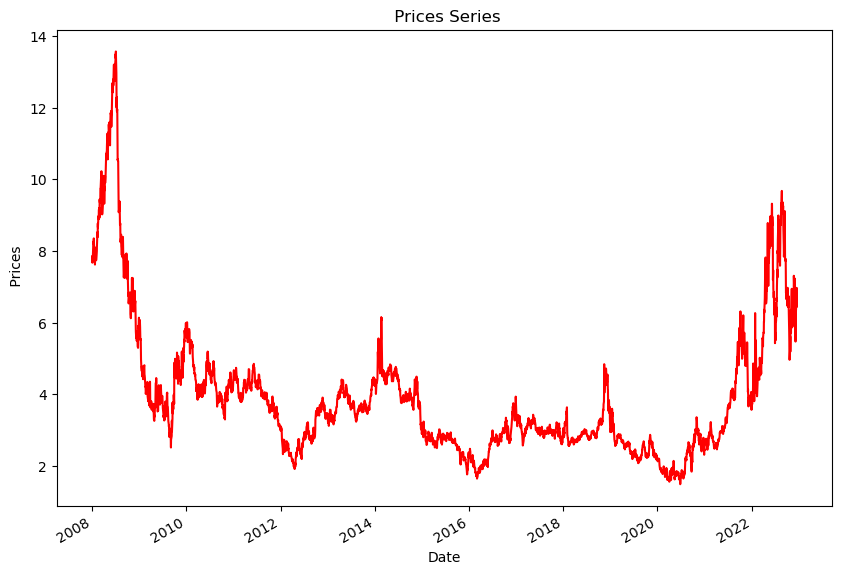

In [16]:
data.Close.plot(figsize=(10,7),color='r')
plt.ylabel(' Prices')
plt.title(' Prices Series')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

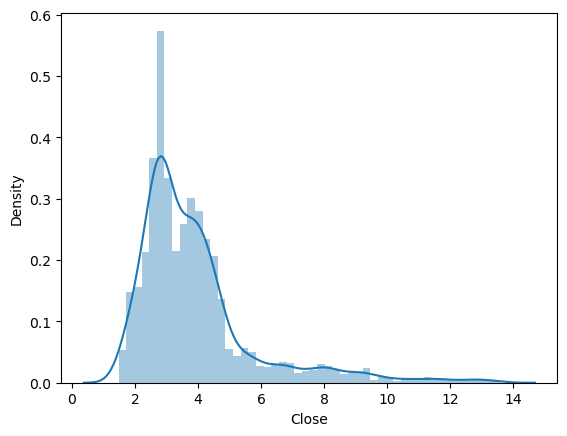

In [18]:
sns.distplot(data['Close'])

In [19]:
data.describe

<bound method NDFrame.describe of              Open   High    Low  Close  Volume
Date                                          
2008-01-02  7.572  7.876  7.564  7.850   68553
2008-01-03  7.873  7.980  7.610  7.674   72742
2008-01-04  7.652  7.859  7.500  7.841   61496
2008-01-07  7.803  7.940  7.701  7.879   56675
2008-01-08  7.909  7.997  7.880  7.967   53775
...           ...    ...    ...    ...     ...
2022-12-12  6.950  7.058  6.487  6.587  171431
2022-12-13  6.534  7.105  6.499  6.935  168109
2022-12-14  6.951  6.961  6.337  6.430  139039
2022-12-15  6.371  7.036  6.358  6.970  139782
2022-12-16  6.888  6.888  6.219  6.600  116642

[3768 rows x 5 columns]>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

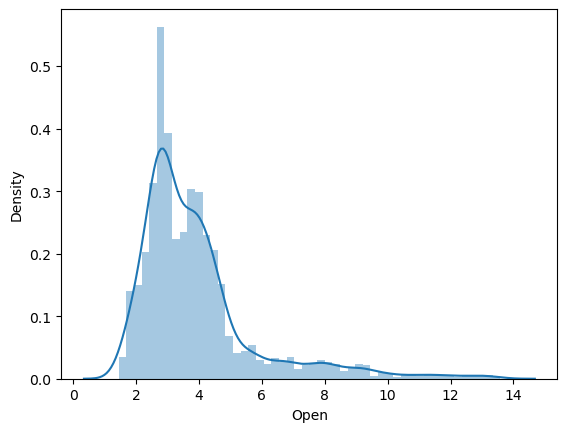

In [20]:
sns.distplot(data['Open'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

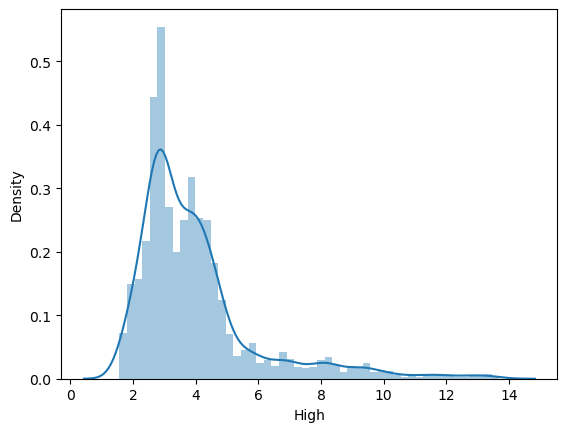

In [21]:
sns.distplot(data['High'])

In [23]:
x=data.drop('Close',axis=1)
y=data['Close']
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=41)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3014, 4)
(3014,)
(754, 4)
(754,)


In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred1=lr.predict(x_test)


In [27]:
from sklearn.metrics import mean_squared_error,r2_score
def calculate_metrics(y_test,y_pred):
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)    
    r2=r2_score(y_test,y_pred)   
    print(mse)
    print(rmse)    
    print(r2)    

In [28]:
calculate_metrics(y_test,pred1)

0.002888040348064871
0.053740490768738526
0.999073385331936


In [31]:
from sklearn.linear_model import Lasso,Ridge
la=Lasso().fit(x_train,y_train)
ri=Ridge().fit(x_train,y_train)

la_p=la.predict(x_test)
ri_p=ri.predict(x_test)

In [32]:
calculate_metrics(y_test,la_p)

0.23871144202835484
0.48858104960011994
0.9234105147573927


In [33]:
calculate_metrics(y_test,ri_p)

0.0029241967762331862
0.05407584281574524
0.9990617847056816


In [43]:
ri_p

array([ 3.9804431 ,  2.80722955,  3.67517498,  3.26161065,  4.38199826,
        2.94879326, 10.70040625,  2.93223541,  3.18293668,  5.17251616,
        4.3302133 ,  4.45328198,  2.29972177,  3.81848725,  4.017304  ,
        2.81750406,  3.25009696,  3.9906606 ,  8.8392916 ,  2.74900508,
        3.61392511,  8.39919187,  3.64430688,  2.2945476 ,  4.52824374,
        2.72314629,  3.76420181,  2.98947411,  4.02722368,  3.46054859,
        4.08569257,  5.47258495,  2.2892729 ,  8.64400288,  2.74970076,
        2.23662187,  5.94445387,  8.80022861,  3.68289943,  3.71154486,
        2.66167697,  2.95506562,  2.22088584,  4.83063918,  4.12873111,
        3.00058538,  2.63210794,  4.02873588,  1.6293302 ,  2.68917376,
        8.15055267,  3.12411957,  3.08243114,  3.80548841,  2.16104166,
        2.65589551,  2.61513509,  2.60128054,  4.5169088 ,  3.35722349,
        2.31946087,  2.60212879,  4.32935542,  3.58385134,  9.98384443,
        1.7682393 ,  2.11891175,  4.05642497,  5.45837319,  2.01

In [44]:
y_test

Date
2010-09-16    4.062
2021-01-12    2.753
2011-11-09    3.652
2013-02-12    3.230
2014-03-25    4.411
              ...  
2016-02-03    2.038
2018-11-30    4.612
2017-12-06    2.922
2018-11-09    3.719
2011-09-26    3.782
Name: Close, Length: 754, dtype: float64

In [36]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr=SVR()
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(x_train, y_train)



Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.5s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.5s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.057 total time=   0.5s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.5s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.074 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.069 total time=   0.5s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.056 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.075 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.073 total time=   0.5s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.069 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

KeyboardInterrupt: 

In [40]:
import joblib

joblib.dump(ri,'model.pkl')
ridge_from_joblib = model = joblib.load("model.pkl")